# ORIE 4580/5580/5581 Assignment 5

#### Students: Kahei Lam (kl2235) and Patric Huang (jh3223)

### Github link: [GitHub Link](https://github.com/Althealam/ORIE-5580-Simulation-Modeling-Analysis/blob/main/HW5/ORIE5580_HW5_KaheiLam_PatricHuang.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.


Let $N$ be the total number of hawks and $\lambda$ the per-bird weekly visit rate.

$$E(\text{all visits per week})=N\lambda \qquad E(\text{tagged visits per week})=10\lambda$$

From the data:
$$\overline{X}_{\mathrm{all}}=28.8, \qquad \overline{X}_{\mathrm{tagged}}=6$$

Method of moments:
$$10\lambda=6 \Rightarrow \hat{\lambda}=0.6$$

Then:
$$N\lambda=28.8 \Rightarrow \hat{N}=\frac{28.8}{0.6}=48$$

Final:
$$\hat{\lambda}=0.6, \qquad \hat{N}=48$$


<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



Now the researcher can identify individual birds. During the next week, she observes $n = 20$ unique birds at the feeder, of which $x = 4$ are tagged.  
The total number of tagged birds in the population is $M = 10$, and the total population size is $N$ (unknown).

The number of tagged birds observed follows a \emph{hypergeometric distribution}:

$$
P(X = x \mid N) = \frac{\binom{M}{x} \binom{N - M}{\,n - x\,}}{\binom{N}{n}}, \qquad N \ge \max(M, n).
$$

The likelihood function is therefore

$$
L(N) \propto \frac{\binom{N - M}{\,n - x\,}}{\binom{N}{n}}.
$$

Maximizing this likelihood (or equivalently using the Lincoln–Petersen estimator) gives

$$
\hat{N}_{\text{MLE}} \approx \frac{M n}{x}.
$$

Substituting the observed values:

$$
\hat{N}_{\text{MLE}} = \frac{10 \times 20}{4} = 50.
$$

Hence, the maximum likelihood estimate of the hawk population size is

$$
\boxed{\hat{N}_{\text{MLE}} = 50.}
$$



<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.

$$ Y = \min(N, 40) $$

PMF of Y:

 $$
 P(Y = y) =
\begin{cases}
(1-p)^y p, & y = 0, 1, 2, \dots, 39,\\[6pt]
P(N \ge 40), & y = 40.
\end{cases}
$$

$$
P(N \ge 40) = \sum_{k=40}^{\infty} (1-p)^k p = (1-p)^{40}.
$$

Therefore, the final PMF is:

$$
P(Y = y) =
\begin{cases}
(1-p)^y p, & y = 0,1,2,\dots,39,\\[6pt]
(1-p)^{40}, & y = 40.
\end{cases}
$$

<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Soup_sales_data.csv to Soup_sales_data.csv


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

data = pd.read_csv("Soup_sales_data.csv")
Y = data['Y'].values

def neg_log_likelihood(p, y):
    p = p[0]
    if p <= 0 or p >= 1:
        return np.inf
    uncensored = y[y < 40]
    censored = y[y == 40]
    ll_uncensored = np.sum(np.log(p) + uncensored * np.log(1 - p))
    ll_censored = len(censored) * 40 * np.log(1 - p)

    return -(ll_uncensored + ll_censored)

result = minimize(neg_log_likelihood, x0=[0.5], args=(Y,), bounds=[(1e-6, 1-1e-6)])
p_hat = result.x[0]

print(f"Maximum Likelihood Estimate of p: {p_hat:.4f}")

Maximum Likelihood Estimate of p: 0.0268


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

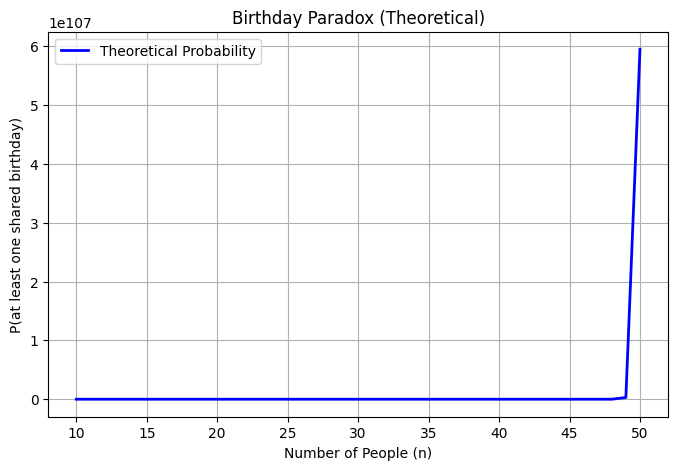

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Theoretical probability ---
def birthday_probability(n):
    numerator = math.factorial(365) / math.factorial(365 - n)
    denominator = 365 ** n
    return 1 - numerator / denominator

n_values = np.arange(10, 51)
theoretical_probs = [birthday_probability(n) for n in n_values]

plt.figure(figsize=(8,5))
plt.plot(n_values, theoretical_probs, 'b-', lw=2, label='Theoretical Probability')
plt.xlabel('Number of People (n)')
plt.ylabel('P(at least one shared birthday)')
plt.title('Birthday Paradox (Theoretical)')
plt.legend()
plt.grid(True)
plt.show()


<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

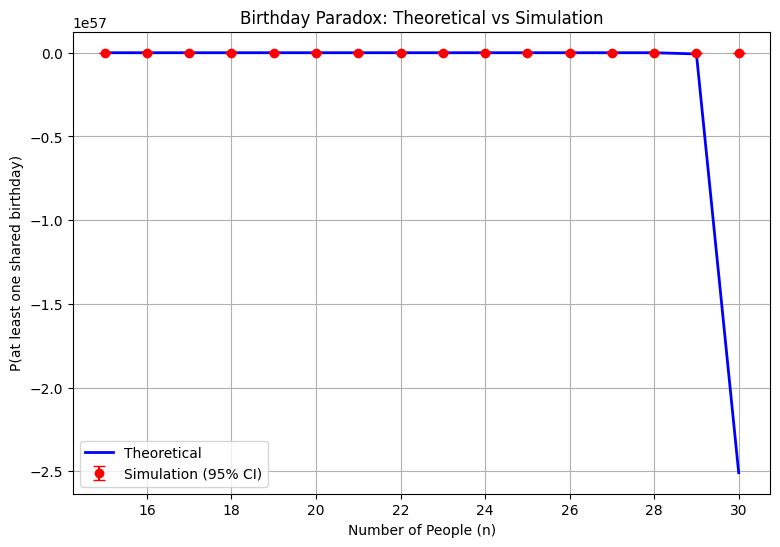

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_birthday(n, trials=10000):
    count_shared = 0
    for _ in range(trials):
        birthdays = np.random.randint(0, 365, n)
        if len(np.unique(birthdays)) < n:
            count_shared += 1
    p_hat = count_shared / trials
    se = np.sqrt(p_hat * (1 - p_hat) / trials)
    ci_low, ci_high = p_hat - 1.96 * se, p_hat + 1.96 * se
    return p_hat, (ci_low, ci_high)

n_values = np.arange(15, 31)
sim_probs = []
ci_lows, ci_highs = [], []

for n in n_values:
    p_hat, (low, high) = simulate_birthday(n)
    sim_probs.append(p_hat)
    ci_lows.append(low)
    ci_highs.append(high)

theoretical_probs = [birthday_probability(n) for n in n_values]

plt.figure(figsize=(9,6))
plt.plot(n_values, theoretical_probs, 'b-', lw=2, label='Theoretical')
plt.errorbar(n_values, sim_probs,
             yerr=[np.array(sim_probs)-np.array(ci_lows), np.array(ci_highs)-np.array(sim_probs)],
             fmt='o', color='r', capsize=4, label='Simulation (95% CI)')
plt.xlabel('Number of People (n)')
plt.ylabel('P(at least one shared birthday)')
plt.title('Birthday Paradox: Theoretical vs Simulation')
plt.legend()
plt.grid(True)
plt.show()


<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

## Ans.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bdaydata.txt to bdaydata (1).txt


/tmp/ipython-input-215168783.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('bdaydata.txt', delim_whitespace=True)


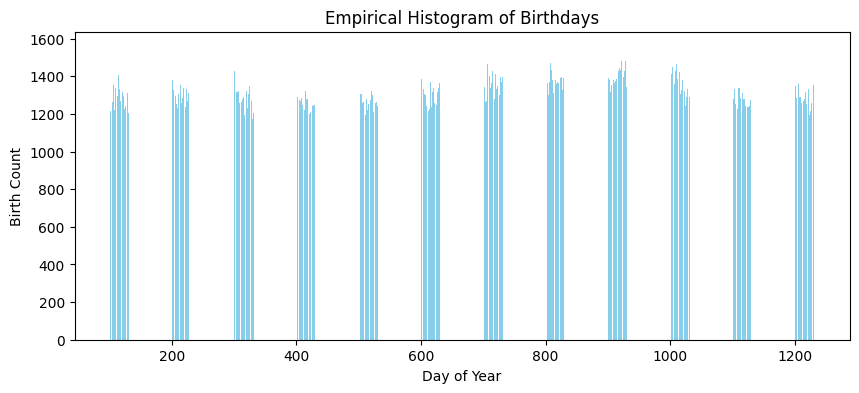

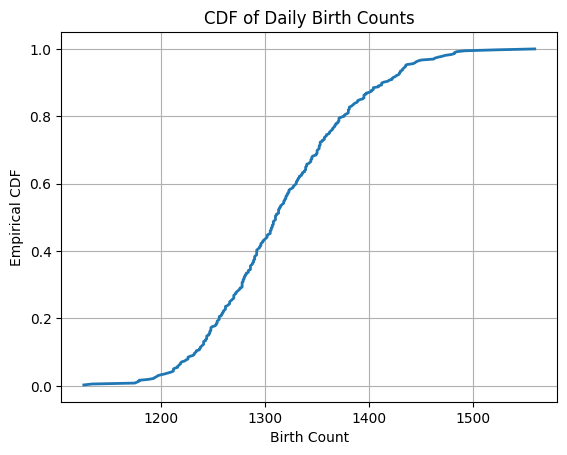

In [ ]:
## Plot histogram
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv('bdaydata.txt', delim_whitespace=True)

days = df['date']
birth_counts = df['count']

# --- Histogram ---
plt.figure(figsize=(10, 4))
plt.bar(days, birth_counts, color='skyblue')
plt.xlabel('Day of Year')
plt.ylabel('Birth Count')
plt.title('Empirical Histogram of Birthdays')
plt.show()

# --- Empirical CDF ---
sorted_counts = np.sort(birth_counts)
cdf = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)
plt.plot(sorted_counts, cdf, lw=2)
plt.xlabel('Birth Count')
plt.ylabel('Empirical CDF')
plt.title('CDF of Daily Birth Counts')
plt.grid(True)
plt.show()



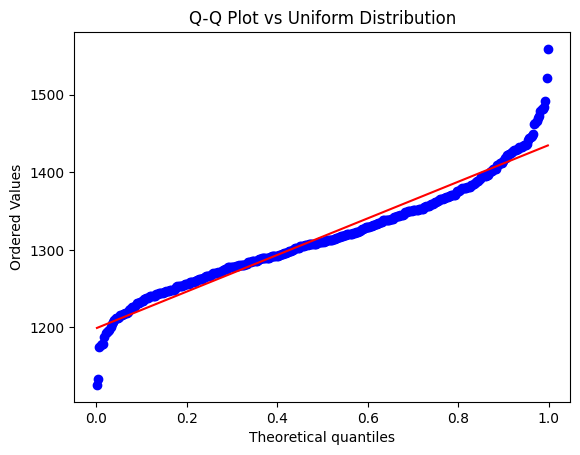

In [ ]:
## Q-Q plot

# --- Q-Q Plot vs Uniform Distribution ---
stats.probplot(birth_counts, dist='uniform', plot=plt)
plt.title('Q-Q Plot vs Uniform Distribution')
plt.show()

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [ ]:
## Chi-square test
from scipy import stats

df = pd.read_csv('bdaydata.txt', delim_whitespace=True)
birth_counts = df['count'].values
n_days = len(birth_counts)

# Expected value under uniform distribution
expected = np.full(n_days, np.mean(birth_counts))

chi2_stat, p_val_chi2 = stats.chisquare(f_obs=birth_counts, f_exp=expected)

print("=== Chi-square Test ===")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"Degrees of freedom: {n_days - 1}")
print(f"P-value: {p_val_chi2:.4e}")

if p_val_chi2 < 0.05:
    print("Reject H0 → The birth counts are NOT uniform.")
else:
    print("Fail to reject H0 → The data are consistent with a uniform distribution.")


=== Chi-square Test ===
Chi-square statistic: 1352.72
Degrees of freedom: 364
P-value: 1.2489e-113
Reject H0 → The birth counts are NOT uniform.


/tmp/ipython-input-659083100.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('bdaydata.txt', delim_whitespace=True)


In [ ]:
## K-S test

# Normalize the counts to [0, 1] for KS test
birth_counts_norm = (birth_counts - np.min(birth_counts)) / (np.max(birth_counts) - np.min(birth_counts))

ks_stat, p_val_ks = stats.kstest(birth_counts_norm, 'uniform')

print("\n=== Kolmogorov–Smirnov Test ===")
print(f"K-S statistic: {ks_stat:.4f}")
print(f"P-value: {p_val_ks:.4e}")

if p_val_ks < 0.05:
    print("Reject H0 → The distribution differs significantly from uniform.")
else:
    print("Fail to reject H0 → The distribution is consistent with uniform.")


=== Kolmogorov–Smirnov Test ===
K-S statistic: 0.2429
P-value: 1.9180e-19
Reject H0 → The distribution differs significantly from uniform.


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


/tmp/ipython-input-1868323944.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('bdaydata.txt', delim_whitespace=True)


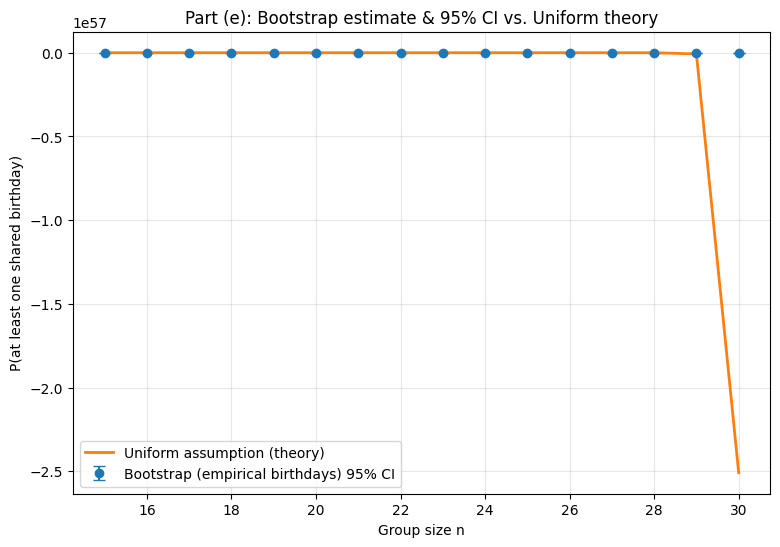

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import default_rng

rng = default_rng()

df = pd.read_csv('bdaydata.txt', delim_whitespace=True)
counts = df['count'].to_numpy()
T = counts.sum()
p_emp = counts / T

def prob_shared_given_p_fast(n, p, trials=5000):
    days = len(p)
    samples = rng.choice(days, size=(trials, n), replace=True, p=p)
    samples.sort(axis=1)
    dup = np.any(samples[:, 1:] == samples[:, :-1], axis=1)
    return dup.mean()

def bootstrap_prob_fast(n, p_hat, T, B=180, trials=1500, alpha=0.05):
    point = prob_shared_given_p_fast(n, p_hat, trials=max(25000, 5*trials))
    boot_vals = np.empty(B)
    for b in range(B):
        counts_star = rng.multinomial(T, p_hat)
        p_star = counts_star / counts_star.sum()
        boot_vals[b] = prob_shared_given_p_fast(n, p_star, trials=trials)
    low, high = np.percentile(boot_vals, [100*alpha/2, 100*(1-alpha/2)])
    return point, low, high

def birthday_prob_uniform(n, days=365):
    if n <= 1: return 0.0
    if n > days: return 1.0
    num = math.factorial(days) / math.factorial(days - n)
    den = days ** n
    return 1 - num / den

n_values = np.arange(15, 31)
boot_points, ci_low, ci_high = [], [], []

for n in n_values:
    pt, lo, hi = bootstrap_prob_fast(n, p_emp, T, B=180, trials=1500, alpha=0.05)
    boot_points.append(pt)
    ci_low.append(lo)
    ci_high.append(hi)

theory_uniform = [birthday_prob_uniform(n) for n in n_values]

plt.figure(figsize=(9,6))
yerr = [np.array(boot_points)-np.array(ci_low), np.array(ci_high)-np.array(boot_points)]
plt.errorbar(n_values, boot_points, yerr=yerr, fmt='o', capsize=4, label='Bootstrap (empirical birthdays) 95% CI')
plt.plot(n_values, theory_uniform, '-', lw=2, label='Uniform assumption (theory)')
plt.xlabel('Group size n')
plt.ylabel('P(at least one shared birthday)')
plt.title('Part (e): Bootstrap estimate & 95% CI vs. Uniform theory')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

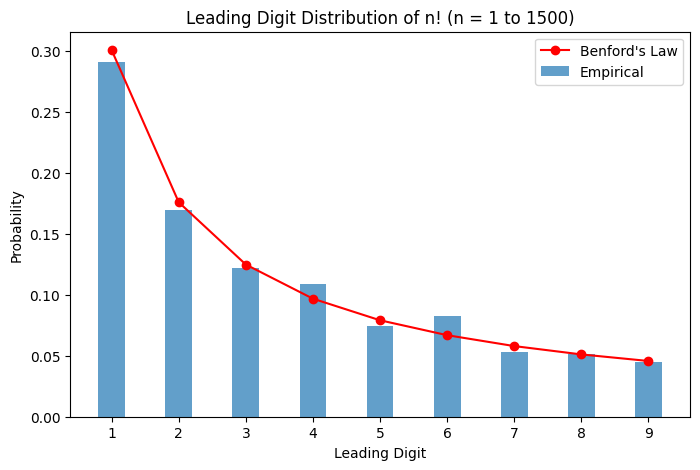

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

n_values = np.arange(1, 1501)
leading_digits = []

for n in n_values:
    fact = factorial(n)
    first_digit = int(str(fact)[0])
    leading_digits.append(first_digit)

unique, counts = np.unique(leading_digits, return_counts=True)
empirical_freq = counts / len(leading_digits)

benford_probs = [np.log10(1 + 1/d) for d in range(1, 10)]

plt.figure(figsize=(8,5))
plt.bar(unique, empirical_freq, width=0.4, label='Empirical', alpha=0.7)
plt.plot(range(1,10), benford_probs, 'ro-', label="Benford's Law")
plt.xticks(range(1,10))
plt.xlabel('Leading Digit')
plt.ylabel('Probability')
plt.title('Leading Digit Distribution of n! (n = 1 to 1500)')
plt.legend()
plt.show()

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [ ]:
from scipy.stats import chisquare
from math import factorial

leading_digits = [int(str(factorial(n))[0]) for n in range(1, 1501)]

counts = np.array([leading_digits.count(d) for d in range(1, 10)])

n = len(leading_digits)
expected_uniform = np.array([n / 9] * 9)  # equal probability 1/9 for each digit

chi_stat, p_value = chisquare(f_obs=counts, f_exp=expected_uniform)

print("Chi-square statistic:", chi_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: digits are not uniformly distributed.")
else:
    print("Fail to reject the null hypothesis: digits are uniformly distributed.")

Chi-square statistic: 667.5120000000002
p-value: 7.04135769230954e-139
Reject the null hypothesis: digits are not uniformly distributed.


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [ ]:
from scipy.stats import chisquare
from math import factorial

leading_digits = [int(str(factorial(n))[0]) for n in range(1, 1501)]

counts = np.array([leading_digits.count(d) for d in range(1, 10)])
n = len(leading_digits)

benford_probs = np.log10(1 + 1 / np.arange(1, 10))
expected_benford = benford_probs * n

chi_stat, p_value = chisquare(f_obs=counts, f_exp=expected_benford)

print("Chi-square statistic:", chi_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: The data does NOT follow Benford's Law Distribution.")
else:
    print("Fail to reject H0: The data fits Benford's Law Distribution.")

Chi-square statistic: 9.768287282336871
p-value: 0.2816672796372305
Fail to reject H0: The data fits Benford's Law Distribution.


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving us_pop.csv to us_pop.csv


Uniform test → χ² = 50323.53572 , p-value = 0.0
Benford test → χ² = 11.843226818111097 , p-value = 0.15833698137848726


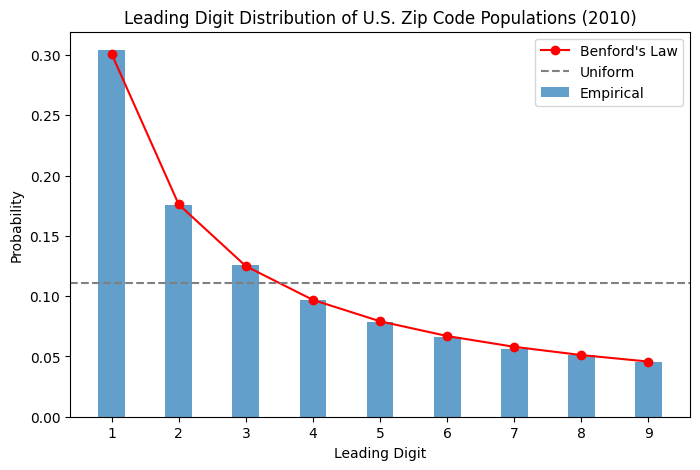

Reject uniform: leading digits are not uniformly distributed.
Fail to reject Benford: data fits Benford's Law Distribution.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

data = pd.read_csv('us_pop.csv')

pop_values = data['population'].values

def leading_digit(x):
    x = abs(x)
    while x >= 10:
        x //= 10
    while x < 1 and x != 0:
        x *= 10
    return int(str(int(x))[0]) if x != 0 else None

leading_digits = [leading_digit(x) for x in pop_values if x > 0]

counts = np.array([leading_digits.count(d) for d in range(1, 10)])
n = len(leading_digits)
empirical_freq = counts / n

# (a) Uniform
expected_uniform = np.array([n / 9] * 9)
# (b) Benford
benford_probs = np.log10(1 + 1 / np.arange(1, 10))
expected_benford = benford_probs * n

chi_uni, p_uni = chisquare(f_obs=counts, f_exp=expected_uniform)
chi_ben, p_ben = chisquare(f_obs=counts, f_exp=expected_benford)

print("Uniform test → χ² =", chi_uni, ", p-value =", p_uni)
print("Benford test → χ² =", chi_ben, ", p-value =", p_ben)

plt.figure(figsize=(8,5))
plt.bar(range(1,10), empirical_freq, width=0.4, label='Empirical', alpha=0.7)
plt.plot(range(1,10), benford_probs, 'ro-', label="Benford's Law")
plt.axhline(1/9, color='gray', linestyle='--', label='Uniform')
plt.xticks(range(1,10))
plt.xlabel('Leading Digit')
plt.ylabel('Probability')
plt.title('Leading Digit Distribution of U.S. Zip Code Populations (2010)')
plt.legend()
plt.show()

if p_uni < 0.05:
    print("Reject uniform: leading digits are not uniformly distributed.")
else:
    print("Fail to reject uniform: digits are uniformly distributed.")

if p_ben < 0.05:
    print("Reject Benford: data does not follow Benford's Law Distributio.")
else:
    print("Fail to reject Benford: data fits Benford's Law Distribution.")

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

   Digit  Benford_Probability
0      1               0.3010
1      2               0.1761
2      3               0.1249
3      4               0.0969
4      5               0.0792
5      6               0.0669
6      7               0.0580
7      8               0.0512
8      9               0.0458

Sum of probabilities: 1.0000


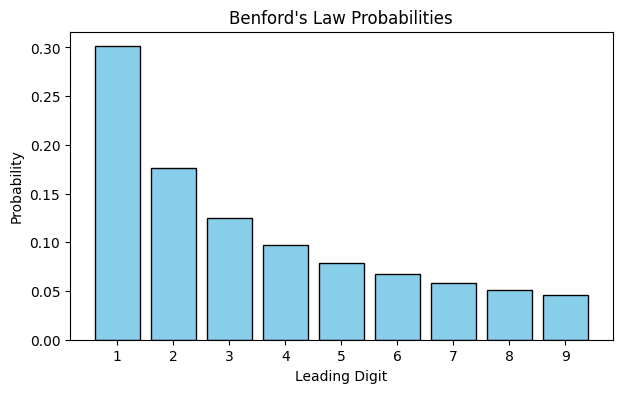

In [ ]:

digits = np.arange(1, 10)
benford_probs = np.log10(1 + 1 / digits)

benford_df = pd.DataFrame({
    'Digit': digits,
    'Benford_Probability': benford_probs
})
benford_df['Benford_Probability'] = benford_df['Benford_Probability'].round(4)
print(benford_df)
print(f"\nSum of probabilities: {benford_probs.sum():.4f}")

plt.figure(figsize=(7,4))
plt.bar(digits, benford_probs, color='skyblue', edgecolor='black')
plt.xticks(digits)
plt.xlabel('Leading Digit')
plt.ylabel('Probability')
plt.title("Benford's Law Probabilities")
plt.show()